In [7]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Step 2: Load the dataset from a CSV file.
df_amazon = pd.read_csv("/content/amazon[1].csv")

In [5]:
# Step 3: Explore the dataset
# Display the first few rows of the dataset
print(df_amazon.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [8]:
# Get basic information about the dataset, including data types and missing values

print(df_amazon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [10]:
# Get summary statistics of numerical columns
print(df_amazon.describe())

        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        

In [9]:
# Check for missing values
df_amazon.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [20]:
# check column names
column_names = df_amazon.columns
print(column_names)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [25]:
# Clean the "rating" column by removing non-numeric characters and converting to float
df_amazon['rating'] = df_amazon['rating'].str.replace('[^0-9.]','',regex=True)

In [26]:
# Convert the "rating" column to float, filling missing values with NaN
df_amazon['rating']= pd.to_numeric(df_amazon['rating'],errors='coerce')

In [27]:
# the dataset does not have a date column. In this case, we cannot create a line plot to visualize the ratings trend.
# However, we can still create a bar plot to show the ratings for each product category.
# Group the data by product category.
df_grouped = df_amazon.groupby("category")["rating"].mean()

In [29]:
# Get bar names.
bar_names = df_grouped.index.astype(str).to_list()

<function matplotlib.pyplot.show(close=None, block=None)>

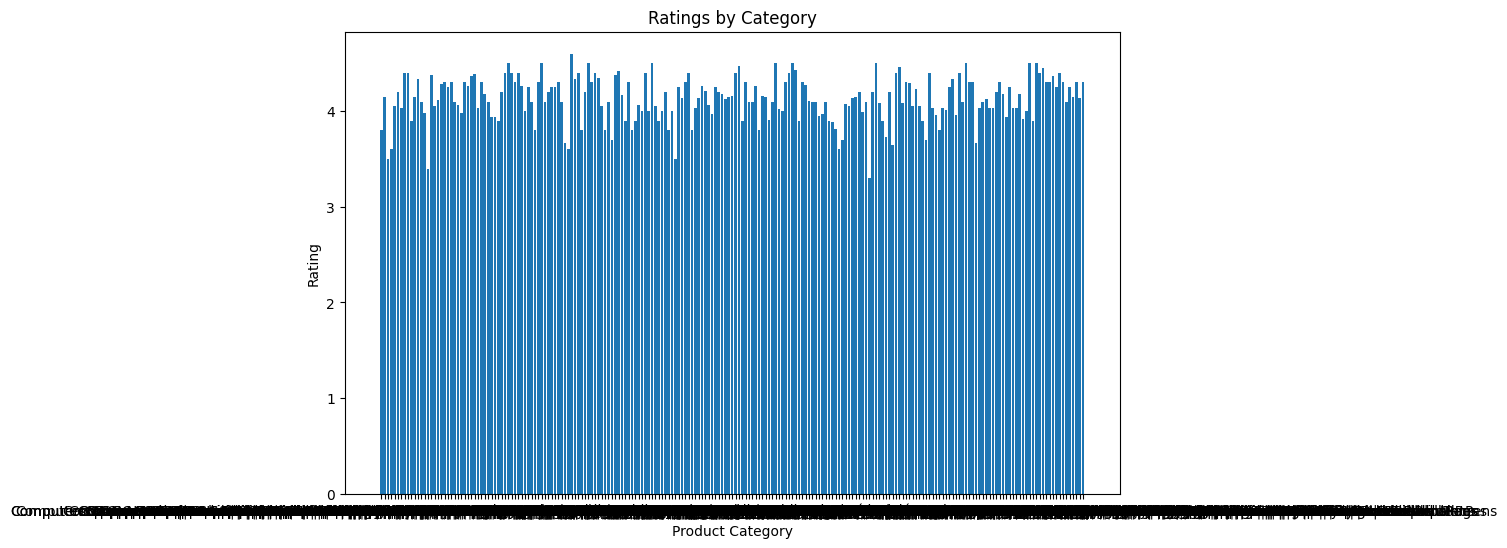

In [36]:
# Create a bar plot to show the ratings for each category
plt.figure(figsize=(10,6))
plt.bar(df_grouped.index,df_grouped.values)
plt.xlabel("Product Category")
plt.ylabel("Rating")
plt.title("Ratings by Category")
plt.show